In [1]:
push!(LOAD_PATH,pwd())
using ProfileView
using constants
using types10
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

kltSA (generic function with 1 method)

In [2]:
Eoff=5.0
Ts=collect(300.0:10.0:900.0)
######################################################################################
##for Liu x=0.6 best fit x=0.635 N=-1.45e20
######################################################################################
numofn=[-6.2e17]#,-1.3e18,-1.0e18,-0.1e18]#,-1.22e18,-1.02e18,-0.94e18]#-9.5e19,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
numofnn=[1e16]#,1e16,1e16,1e16]#,1e18,1e18]
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
xs=[0.6]#,0.6,0.6,0.6]#,0.8,0.7,0.61]#collect(0.0:0.01:1.0)
Es=collect(0.0:0.05:3.0)
#effmassFastX1(var)=
setDOSintgrid(50)
setDOSgridx(50)
settauintgrid(50)
var0=[Ts[1],xs[1]]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

alphaX1(var)=0.0#EX1(var0)
alphaX3(var)=0.0#EX1(var0)
alphaLH(var)=0.0#EX3(var0)
alphaHH(var)=0.0#EX3(var0)

function Da(band::parBandTx,x::Float64)
    Da=7.0#9.0-1.5*x*x
    Dv=1.0#4.0
    if band==bandX3 ||  band==bandX1
        return Da
    end
    if band==bandHH ||  band==bandLH
        return Dv
    end
end

bandX3=parBandTx(true,1.0,effMassX3(var0),alphaX3(0.0),EX3(var0),[EX3],[effMassX3],[alphaX3],var0)
bandX1=parBandTx(true,1.0,effMassX1(var0),alphaX1(0.0),EX1(var0),[EX1],[effMassX1],[alphaX1],var0)
bandHH=parBandTx(true,1.0,effMassHH(var0),alphaHH(0.0),EHH(var0),[EHH],[effMassHH],[alphaHH],var0)
bandLH=parBandTx(true,1.0,effMassLH(var0),alphaLH(0.0),ELH(var0),[ELH],[effMassLH],[alphaLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX1,bandX3,bandX3,bandX3],var0)#
#bndstTx=BandStrucTx([bandLH,bandHH],var0)#

#vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
vartau0=[bandX3.effMass,Ts[1],EX1(var0),xs[1],EX1(var0),bandX3,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandLH]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst
#tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauAC(var)=tauAC_func(Cl(var[4]),Da(var[6],var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1]
,var[3],tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP2lowN_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauPOP3(var)=tauPOP3_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(epsilon0_x(var[4]),var[1],var[9])
tauTOTTx=tau_electron_B([tauAC,tauPOP3,tauII2,tauNI],vartau0)#,tauII2,tauNI,tauPOP3],vartau0)#,tauII2,tauPOP2

xmax=3.0

3.0

In [3]:
#Eoff-Egx3(700.0,0.6)

In [4]:
#@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis,sigmaes,sigmahs,seebeckes,seebeckhs)=electronicPropsiso(bndstTx,xs,Ts,numofn,numofnn,tauTOTTx,xmax)
#x=3.0

In [5]:
@time @fastmath (Efs,sigmas,seebecks,kes,kees,kehs,kbis,sigmaes,sigmahs,seebeckes,seebeckhs)=electronicPropsiso(bndstTx,xs,Ts,numofn,numofnn,tauTOTTx,xmax)
x=3.0

 25.821256 seconds (102.48 M allocations: 27.600 GiB, 10.87% gc time)


3.0

In [6]:
foreach(x->println(x," ", kees[x,1,1]),1:length(sigmaes[:,:,1]))

1 0.004194494092821063
2 0.0043684723594322045
3 0.0045365122331881835
4 0.0046978669532570655
5 0.004852862463383595
6 0.005003128745064034
7 0.005151997183146295
8 0.005305056299670291
9 0.005470745385123488
10 0.005660942684728804
11 0.005891208804689435
12 0.006180435008372759
13 0.006550595231649886
14 0.0070226076221950595
15 0.007616883795023344
16 0.008352341156401849
17 0.009245979961830686
18 0.010313452601183049
19 0.011569793115872251
20 0.01302986987519722
21 0.014708798023395142
22 0.016622049020628082
23 0.018785472795209535
24 0.021215233638434805
25 0.023927760467426173
26 0.026939579899472488
27 0.030267345015947023
28 0.033927601442338196
29 0.037936697859198176
30 0.0423108362015332
31 0.047065792874749546
32 0.052226470337133124
33 0.057793931906549134
34 0.0637856184168768
35 0.07021632387541266
36 0.07709951982491425
37 0.08444811200929458
38 0.09227415697622354
39 0.10058889663176007
40 0.10940306974237446
41 0.11872649373971966
42 0.12856833357435304
43 0.13893

In [7]:
T_EF_Dict=Dict()
for (Ti,Tx) in enumerate(Ts)
    T_EF_Dict[Tx]=(Efs[Ti])    
end
T_EF_Dict_Array=Array{Dict{Float64,Float64},2}(undef,length(numofn),length(xs))
Dict_temp=Dict()
Efsr=Array{Float64,3}(undef,length(Ts),length(numofn),length(xs))
for (j,jn) in enumerate(numofn)
    for (k,kx) in enumerate(xs) 
        for (i,iT) in enumerate(Ts)
            Efsr[i,j,k]=Efs[i,j,k]-EX3(0.0)
            Dict_temp[iT]=Efsr[i,j,k]
            T_EF_Dict_Array[j,k]=Dict_temp 
        end
    end
end
#foreach(i->println("$i= ",Ts[i]),1:length(Ts))
#Efsr

In [8]:
MgSiSn4hKCT=[27.204980536447565,125.22263104569937,250.3986028902043, 300.61256865568174,350.4225990508186, 400.31661600810537,
450.60323681544304,500.88852450274595,550.37460672959,]
MgSiSn4hKCK=[ 2.8789473684210525, 2.7375, 2.609210526315789, 2.5121710526315786, 2.4184210526315786, 2.531907894736842, 2.614144736842105
, 2.6930921052631573, 2.7999999999999994]
MgSiSn2hKCT=[27.174994546327184, 125.66321921825845, 250.56521889830958, 300.8030294412153, 350.04276302458277,400.3366068836394, 
450.6409643790327, 500.95101524496823,550.7594666065552]
MgSiSn2hKCK=[2.608956937799043, 2.4846513157894736, 2.4523355263157893, 2.3861330409356722, 2.3131756578947367
, 2.385235380116959, 2.4832374999999995, 2.595288011695906, 2.697641746411483]
MgSiSn05hKCT=[26.1867119039,124.6184700145,249.7991072943,300.1809590466,349.8324946796,399.3641637338,450.1016014407,
450.7811561579,549.7232004091,500.4092678505]
MgSiSn05hKCK=[2.4217028509,2.3627326555,2.2459551435,2.1025076754,2.0223385167,2.2370652412,2.3803594498,2.302875,
2.5966549043,2.5105263158]
MgSiSn2h2TiO2KCT=[450.7811561579,26.5677491601,125.429931211,250.6172345758,300.4185996907,350.6278995361,
400.1639737642,500.3759398496,550.2639577668]
MgSiSn2h2TiO2KCK=[2.302875,2.3065789474,2.2490131579,2.1486842105,2.0335526316,1.925,2.1552631579,2.4282894737,
2.5269736842]
MgSiSn2h5TiO2KCT=[27.3549565403,124.5907321495,250.1753052845,299.9806697595,350.1926358449,400.1339785634,
450.0339945609,500.3299472084,550.6152348958]
MgSiSn2h5TiO2KCK=[2.2490131579,2.1782894737,2.0582236842,1.9529605263,1.8509868421,2.08125,2.2095394737,2.3148026316,
2.39375]
MgSiSn0hKCT=[26.9755694846,125.1437396683,250.3474884019,300.0735322348,349.8027683571,400.6191835973,449.916314723,
500.2366154749,550.052698235]
MgSiSn0hKCK=[2.1168755981,2.0268355263,1.9150855263,1.8140986842,1.7209888158,1.8544934211,1.9231644737,2.0605065789,
2.1816907895]

9-element Array{Float64,1}:
 2.1168755981
 2.0268355263
 1.9150855263
 1.8140986842
 1.7209888158
 1.8544934211
 1.9231644737
 2.0605065789
 2.1816907895

In [9]:
MgSiSn4hECE=[10,45,98,126,105,69.6,82.8,100,110]
MgSiSn2hECE=[3,4.4,8.5,15.8,22.2,55.6,50.8,68,80]
MgSiSn1hECE=[2,4.2,3.7,11.8,22.2,25.6,30.8,48,64]
MgSiSn0hECE=[1.6,1.7,3.8,7.8,12.2,25.6,40.8,68,62]

9-element Array{Float64,1}:
  1.6
  1.7
  3.8
  7.8
 12.2
 25.6
 40.8
 68.0
 62.0

In [10]:
foreach(x->println(sigmas[x,1,1]),1:length(sigmas[:,1,1]))

1005.8296336039673
1002.2473518343263
996.5761627411694
989.4527315421194
981.987508457596
973.9490272675904
966.7042624654631
962.0959670862885
961.9372064880722
968.6508147637933
985.179680195595
1014.8228594461104
1061.1210750466757
1126.997613746462
1214.926790778972
1326.8211003559804
1464.0398903618234
1627.5780069139173
1818.247652992235
2037.5263097961647
2288.2944543430713
2573.541222601709
2896.622717880652
3261.5346806956222
3673.4243280621276
4139.810414103809
4674.2127922784985
5311.627986243714
6323.62068170057
6636.832841529771
7198.6623455010495
7859.055306540929
8579.799089069706
9352.797910020394
10174.923962979914
11044.673297977466
11961.201263421
12923.930613658933
13932.39055683503
14986.152300277874
16084.77343760429
17227.78901686595
18414.861464775204
19651.813516638835
20947.733070218797
22309.25480267777
23742.98770108897
25256.872999612206
26862.261500135788
28578.544772581732
30449.900454331982
32604.512065183
35749.56079287767
36360.17912102748
37984.35260

In [11]:
foreach(x->println(seebecks[x,1,1].*10^6),1:length(sigmas[:,1,1]))

-610.770320142249
-610.9654064783357
-611.209548132223
-611.2298876574549
-610.0592354753768
-609.1556153600219
-607.5337099059957
-603.892122238542
-597.5627642488452
-587.6386309216548
-573.2622503410582
-553.922748874474
-529.7430353974509
-501.62468342241607
-471.0579533670095
-439.7379730168448
-409.16822754241815
-380.4246448743878
-354.1166949731863
-330.1820825177376
-307.9956648952869
-287.1261656882172
-267.2246407462348
-247.9694916417777
-229.0091305061792
-209.85105423612185
-189.56966539266068
-165.5775198507569
-116.95774302729555
-135.93639189672206
-136.2625212761783
-132.14676645602103
-126.94055071081124
-121.48816483131166
-116.09284523268208
-110.87561221898808
-105.8847202618238
-101.13420869465523
-96.62173220277157
-92.33800973046547
-88.26951242171225
-84.40167334243512
-80.71665029829322
-77.09532432333516
-73.40027755118943
-69.56811702796112
-65.55787494561856
-61.32854585984028
-56.82022250552398
-51.91708559887228
-46.34066087323233
-39.14745353705357
-25.

In [12]:
#foreach(x->println(sigmas[x,2,2]),1:length(sigmas[:,2,2]))

In [13]:
#foreach(x->println(sigmas[x,3,3]),1:length(sigmas[:,3,3]))

In [14]:
#foreach(x->println(sigmas[x,4,4]),1:length(sigmas[:,4,4]))

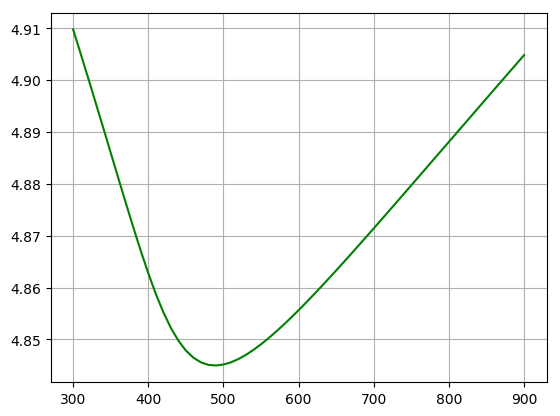

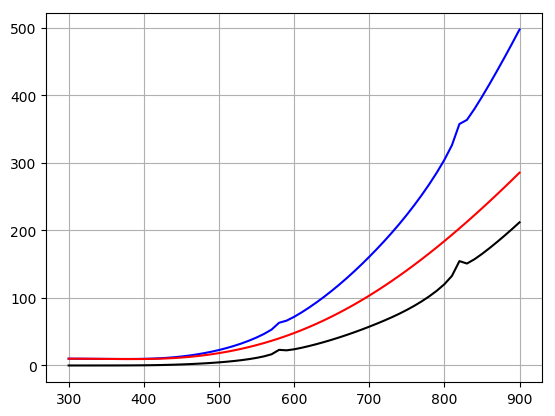

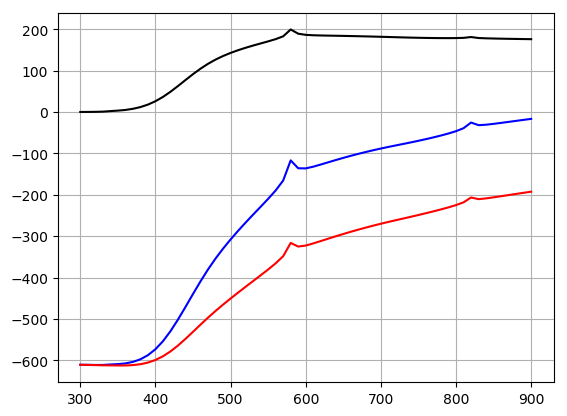

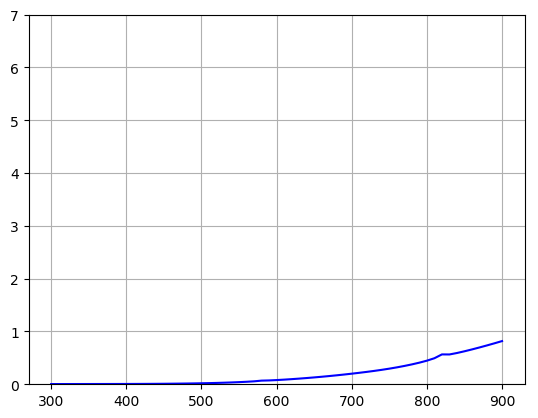

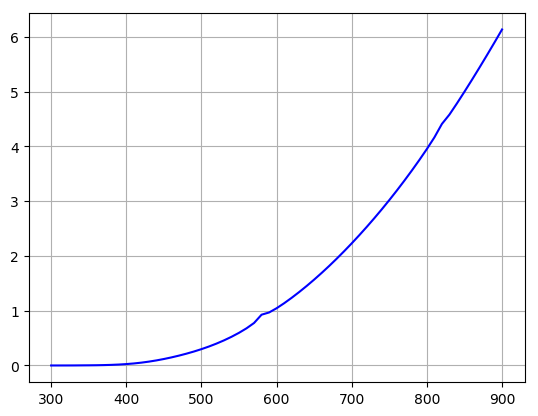

In [15]:
figure()
plot(Ts,Efs[:,1,1],linestyle="-",color="g")
grid()

figure()
#plot(Ts,sigmas[:,1,1]/100,linestyle="None",marker=".",color="b")
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="b")
plot(Ts,sigmaes[:,1,1]/100,linestyle="-",color="r")
plot(Ts,sigmahs[:,1,1]/100,linestyle="-",color="k")
#plot(Ts,sigmas[:,2,2]/100,linestyle="-",color="r")
#plot(Ts,sigmas[:,3,3]/100,linestyle="-",color="k")
#plot(Ts,sigmas[:,4,4]/100,linestyle="-",color="g")
#plot(MgSiSn4hKCT .+273,MgSiSn4hECE,linestyle="None",marker=".",markersize=10,color="r")
#plot(MgSiSn4hKCT .+273,MgSiSn2hECE,linestyle="None",marker=".",markersize=10,color="k")
#plot(MgSiSn4hKCT .+273,MgSiSn1hECE,linestyle="None",marker=".",markersize=10,color="b")
#plot(MgSiSn4hKCT .+273,MgSiSn0hECE,linestyle="None",marker=".",markersize=10,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Green_EC_E/100,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Blue_EC_E/100,linestyle="None",marker="o",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Pink_EC_E/100,linestyle="None",marker="o",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Black_EC_E/100,linestyle="None",marker="o",markersize=2,color="k")
grid()

figure()
#plot(Ts,-seebecks[:,1,1]*1e6,linestyle="None",marker=".",color="b")
plot(Ts,seebecks[:,1,1]*1e6,linestyle="-",color="b")
plot(Ts,seebeckes[:,1,1].*sigmaes[:,1,1]./sigmas[:,1,1]*1e6,linestyle="-",color="r")
plot(Ts,seebeckhs[:,1,1].*sigmahs[:,1,1]./sigmas[:,1,1]*1e6,linestyle="-",color="k")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="r")
#plot(Ts,-seebecks[:,3,3]*1e6,linestyle="-",color="k")
#plot(Ts,-seebecks[:,4,4]*1e6,linestyle="-",color="g")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="b")
#plot(SiGe_Vin_162_Bulk_SC_T,SiGe_Vin_162_Bulk_SC_S,linestyle="None",marker=".",markersize=10,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Green_SC_S,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Blue_SC_S,linestyle="None",marker="x",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Pink_SC_S,linestyle="None",marker="x",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Black_SC_S,linestyle="None",marker="x",markersize=2,color="k")
grid()

figure()
plot(Ts,kes[:,1,1],linestyle="-",color="b")
ylim(0,7)
grid()

figure()
plot(Ts,kbis[:,1,1],linestyle="-",color="b")
grid()

In [16]:
ophe=(40.5*(1-0.6)+28.8*0.6)/1000 

0.03348

In [17]:
Exx=collect(5.0:0.01:6.0)
taupop3=Array{Float64,1}(undef,length(Exx))
for (Exi,Exxx) in enumerate(Exx)
    taupop3[Exi]=tauPOP3_func(epsilon0_x(0.6),epsilonhf_x(0.6),bandX1,0.0,550.0,0.38,Exxx,ophe)  
    
end

In [18]:
taupop3

101-element Array{Float64,1}:
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 6.805994604254946e-30 
 1.7438337628470135e-29
 3.8701189933141035e-29
 4.268637186187672e-29 
 3.6690401917418623e-29
 3.676829978325072e-29 
 ⋮                     
 1.2764805593277868e-28
 1.2844044518114834e-28
 1.2922813130721878e-28
 1.3001119600575119e-28
 1.307897186550299e-28 
 1.3156377640706667e-28
 1.3233344427337178e-28
 1.3309879520655481e-28
 1.3385990017799673e-28
 1.3461682825182153e-28
 1.3536964665537811e-28
 1.361184208464318e-28 

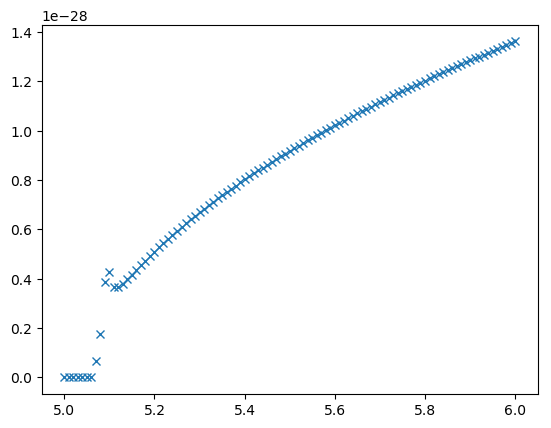

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2acd9cb898>

In [19]:
plot(Exx,taupop3,marker="x",linestyle="None")